# Lab 8: Define and Solve an ML Problem of Your Choosing

In [120]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [121]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(WHRDataSet_filename)# YOUR CODE HERE

df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I chose the happiness dataset.
2. I'll be predicting the happiness of the country. The label is Life Ladder.
3. This is a supervised learning problem and will be a regression problem. This is because we are trying to find a numerical measure of happiness
4. I plan to include everything except the country name, which shouldn't affect the happiness label. Including the name may lead to the model learning the name, when we want to base it on the other features.
5. This is important because we can see what features make the biggest impact to a country's happiness. This can help us figure out what to prioritize to help raise the happiness of a particular country.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [122]:
print(df.select_dtypes(include ='float').isnull().sum())

Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by country-year             0
GINI index (World Bank estimate)                            979
GINI index (World Bank estimate), averag

In [123]:
# YOUR CODE HERE
#get rid of null 
na_col = df.select_dtypes(include ='float').isnull()
for col in na_col:
    df[col] = df[col].fillna(df[col].mean()) 
print(df.isnull().sum())

country                                                     0
year                                                        0
Life Ladder                                                 0
Log GDP per capita                                          0
Social support                                              0
Healthy life expectancy at birth                            0
Freedom to make life choices                                0
Generosity                                                  0
Perceptions of corruption                                   0
Positive affect                                             0
Negative affect                                             0
Confidence in national government                           0
Democratic Quality                                          0
Delivery Quality                                            0
Standard deviation of ladder by country-year                0
Standard deviation/Mean of ladder by country-year           0
GINI ind

In [124]:
#normalize the labels
df['Life Ladder'].value_counts(normalize=True)

3.723590    0.00064
4.760276    0.00064
5.208147    0.00064
4.413919    0.00064
5.671461    0.00064
             ...   
5.622519    0.00064
4.756237    0.00064
4.720251    0.00064
5.096354    0.00064
3.638300    0.00064
Name: Life Ladder, Length: 1562, dtype: float64

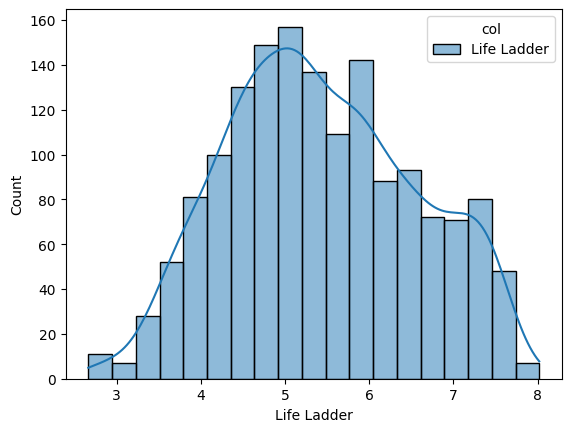

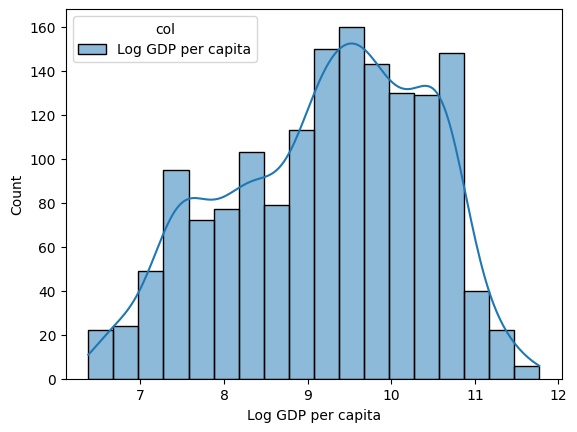

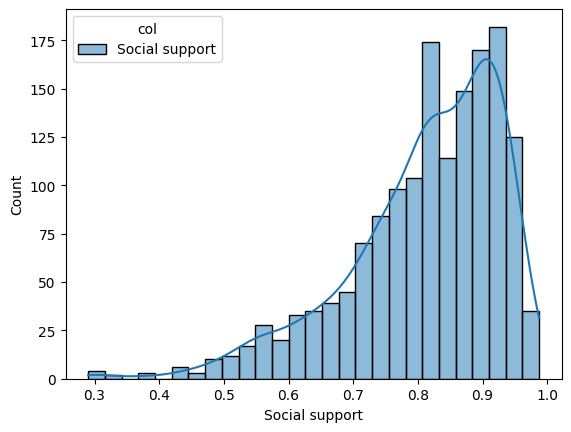

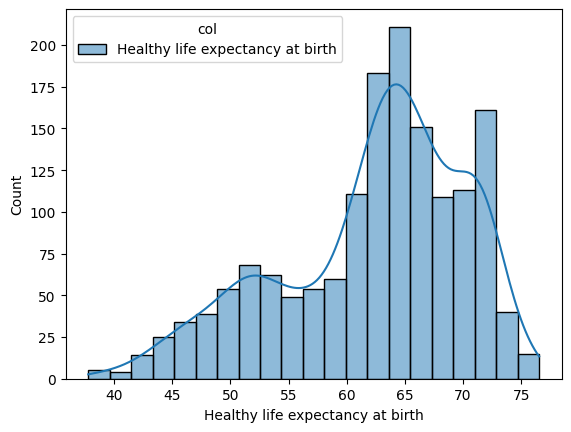

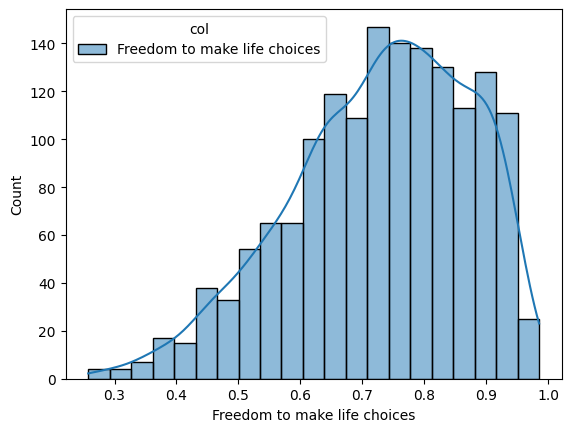

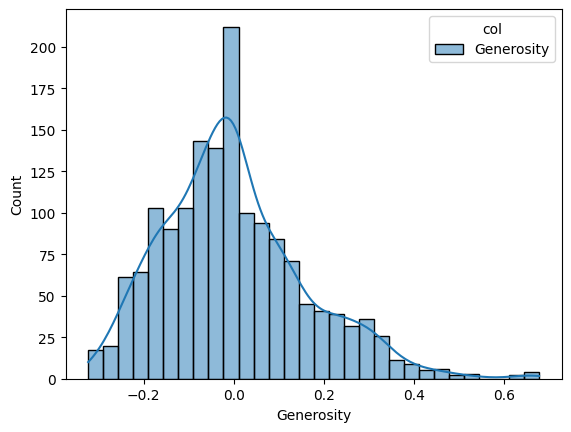

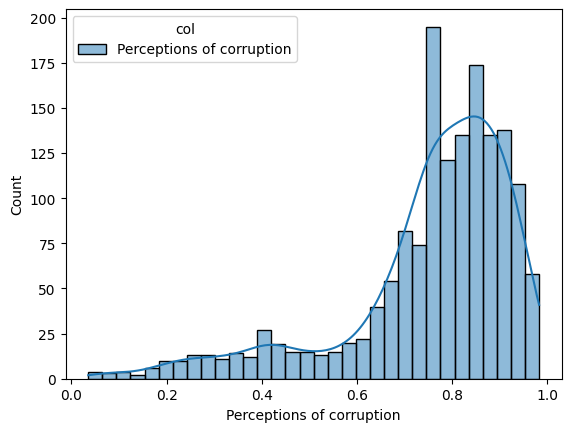

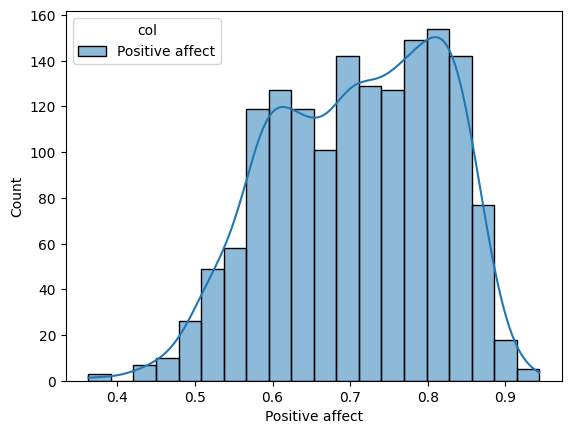

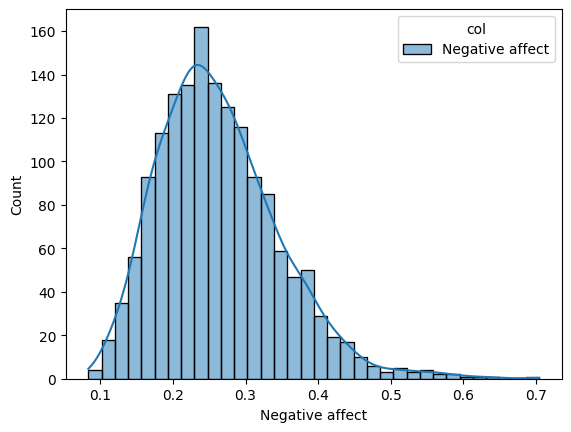

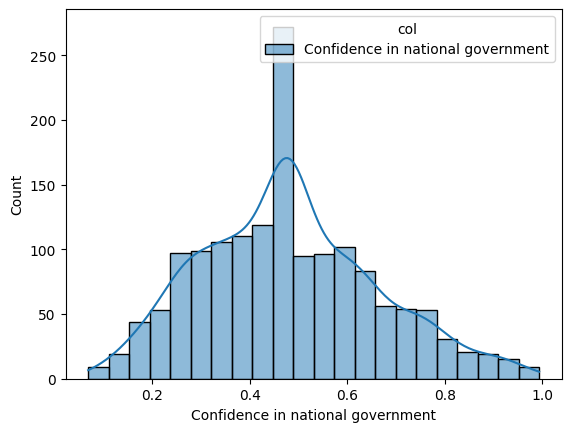

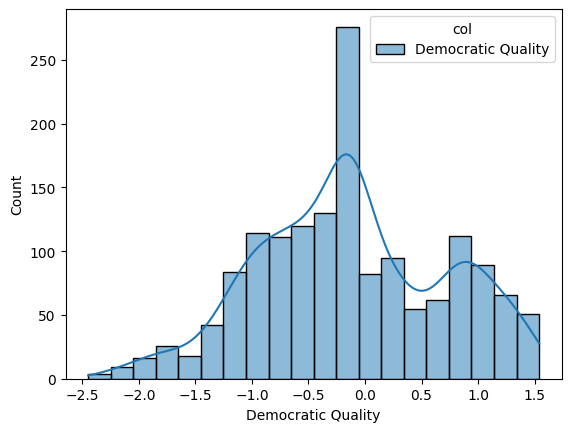

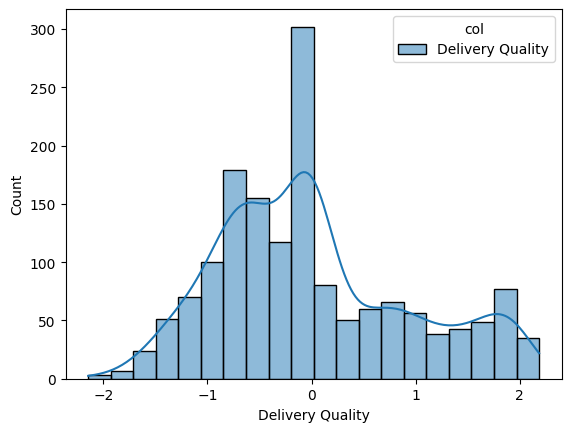

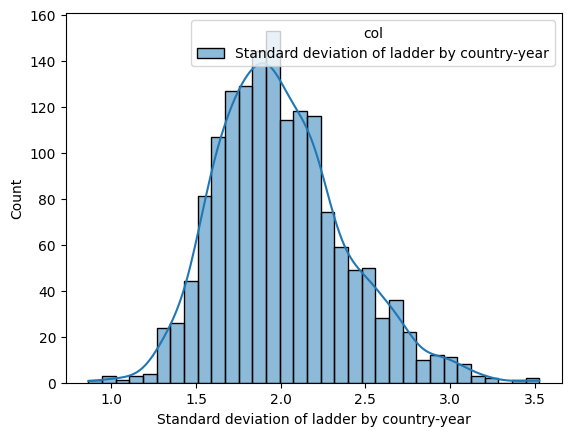

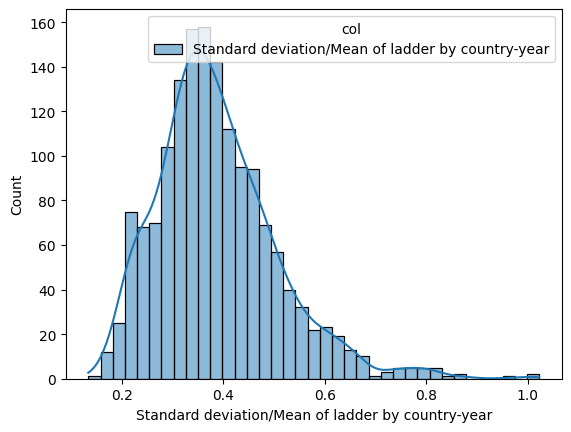

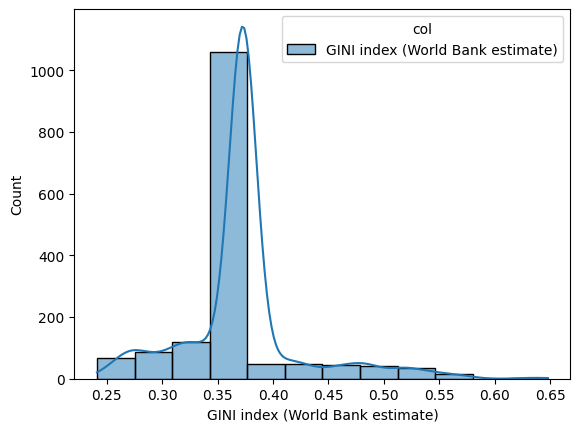

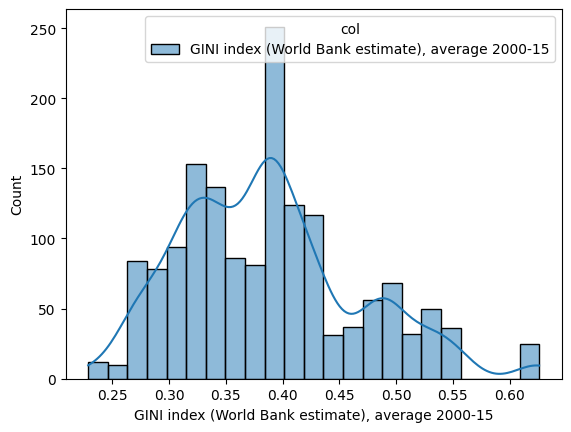

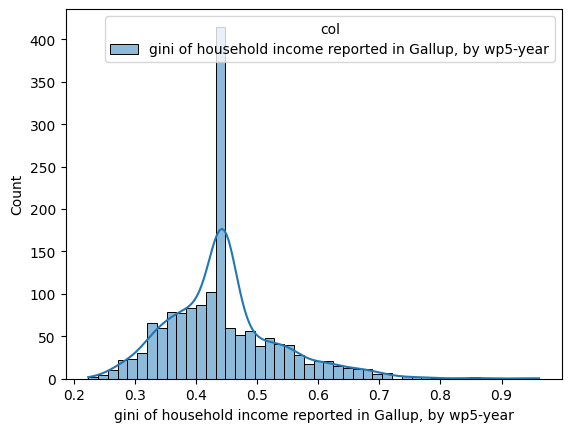

In [125]:
#find outliers - overall seems pretty balanced and no out of the norm points
numeric_cols = df.select_dtypes(include='float').columns
for col in numeric_cols:
    sns.histplot(df[col], kde=True, label = col)
    plt.legend(title='col')
    plt.show()

In [126]:
# normalization of feature 'healthy life expectancy at birth"  (in the 50 ranges, while rest are 0-1)
df['Healthy life expectancy at birth'] = (df['Healthy life expectancy at birth'] - df['Healthy life expectancy at birth'].min()) / (df['Healthy life expectancy at birth'].max() - df['Healthy life expectancy at birth'].min())

In [127]:

X = df.drop(['country', 'Life Ladder', 'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year'], axis = 1)
y = df['Life Ladder']
X.head(10)

,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,2008,7.168690,0.450662,0.295157,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,0.372846,0.386948,0.445204
1,2009,7.333790,0.552308,0.305855,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,0.372846,0.386948,0.441906
2,2010,7.386629,0.539075,0.315773,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,0.372846,0.386948,0.327318
3,2011,7.415019,0.521104,0.325016,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,0.372846,0.386948,0.336764
4,2012,7.517126,0.520637,0.333836,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,0.372846,0.386948,0.344540
5,2013,7.503376,0.483552,0.342444,0.577955,0.074735,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,0.372846,0.386948,0.304368
6,2014,7.484583,0.525568,0.350892,0.508514,0.118579,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,0.372846,0.386948,0.413974
7,2015,7.466215,0.528597,0.359223,0.388928,0.094686,0.880638,0.553553,0.339276,0.260557,-1.844364,-1.291594,0.372846,0.386948,0.596918
8,2016,7.461401,0.559072,0.367555,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693,-1.432548,0.372846,0.386948,0.418629
9,2017,7.460144,0.490880,0.375886,0.427011,-0.106340,0.954393,0.496349,0.371326,0.261179,-0.126617,0.004947,0.372846,0.386948,0.286599


In [128]:
y.head(10)

0    3.723590
1    4.401778
2    4.758381
3    3.831719
4    3.782938
5    3.572100
6    3.130896
7    3.982855
8    4.220169
9    2.661718
Name: Life Ladder, dtype: float64

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)
print(X.columns)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

Index(['year', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Confidence in national government',
       'Democratic Quality', 'Delivery Quality',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')


((468, 15), (1094, 15), (468,), (1094,))

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. Here is the feature list: ['year', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Confidence in national government','Democratic Quality', 'Delivery Quality','Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year', 'GINI index (World Bank estimate)', 'GINI index (World Bank estimate), average 2000-15', 'gini of household income reported in Gallup, by wp5-year']
I took out the only categorical column 'country' since it didn't seem like this is a factor we want to use to predict. This is because we want to see the statistics of the other features of countries and how that influences the 'life ladder' column, and this could cause data leakage. Ultimately, the name of a country should not signify its life ladder. I also took out the label and other forms of the label[ 'Life Ladder', 'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year']).
p.
2.  I got rid of null data by replacing it with the mean. I also normalized the 'healthy life expectancy at birth' feature since it was in the 50 range, and the rest of the data were from 0-1. The data seemed like there weren't any huge outliers, so I kept them.
3.  I decided to go with a Random Forest, as it is fast and works well with nonlinear data. It is not a huge dataset, so using a neural network doesn't seem like it would fit the data. A random forest regression model also is quick to implement and simple to understand.
4.   I will split the dataset and use k-fold cross-validation for better generalization, as this is a small dataset. I will start with a baseline model, such as a Random Forest regressor, and evaluate its performance using metrics like RMSE and R^2. To improve the model, I will perform hyperparameter tuning using techniques like grid search,  analyze residuals to detect bias or errors, and iterate on feature engineering and selection for best accuracy. This approach aims to end up with a model that does well with generalization.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [130]:
# YOUR CODE HERE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [131]:
# YOUR CODE HERE
rf = RandomForestRegressor(n_estimators=100)


In [132]:
kf = KFold(n_splits=5, shuffle=True)
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']
cv_results = dict()
for score in scoring:
    cv_results[score]= cross_val_score(rf, X, y, cv=kf, scoring=score)

rmse = np.sqrt(-cv_results['neg_mean_squared_error'])
mae = -cv_results['neg_mean_absolute_error']
r2 = cv_results['r2']
print("RMSE:", rmse)
print("Mean RMSE:", rmse.mean())
print("MAE:", mae)
print("Mean MAE:", mae.mean())
print("R2:", r2)
print("Mean R2:", r2.mean())

RMSE: [0.35554181 0.38393965 0.36099724 0.39210341 0.39646437]
Mean RMSE: 0.37780929579239464
MAE: [0.28689986 0.27642089 0.29919714 0.28888208 0.29115571]
Mean MAE: 0.28851113763590946
R2: [0.88830597 0.8773948  0.89290556 0.89040307 0.88636725]
Mean R2: 0.8870753287413227


In [133]:
#max_depth = [None, 5, 10]
max_depth = [None, 5]
min_samples_split = [2, 5, 10]
#n_estimators =  [100, 200, 300]
n_estimators =  [100, 200]

results = []
for n in n_estimators:
    for d in max_depth:
        for s in min_samples_split:
            # building random forest
            print('max_depth, min_samples_split, n_estimators : (' + str(d)+", "+ str(s) +", " + str(n) + ")")
            rf = RandomForestRegressor(n_estimators=n, max_depth = d, min_samples_split = s)

            #calculating cross val scores
            cv_results = dict()
            #for score in scoring:
                #cv_results[score]= cross_val_score(rf, X, y, cv=kf, scoring=score)
            cv_results= cross_val_score(rf, X, y, cv=kf, scoring='neg_mean_squared_error')
            
            #printing results
            rmse = np.sqrt(-cv_results).mean()
            #mae = -cv_results['neg_mean_absolute_error']
            #r2 = cv_results['r2']
            #results.append[max_depth, min_samples_split, n_estimators, rmse, mae, r2]
            results.append([d, s, n, rmse])
            print("Mean RMSE:", rmse)
            #print("Mean MAE:", mae.mean())
            #print("Mean R2:", r2.mean())

#get best features!
            
results_df = pd.DataFrame(results, columns=['max_depth', 'min_samples_split', 'n_estimators', 'mean_rmse'])

#best_feat = results_df[np.argmin[results[:, 3]], 0:2]

max_depth, min_samples_split, n_estimators : (None, 2, 100)
Mean RMSE: 0.38129584996351384
max_depth, min_samples_split, n_estimators : (None, 5, 100)
Mean RMSE: 0.3847400869259749
max_depth, min_samples_split, n_estimators : (None, 10, 100)
Mean RMSE: 0.38580396082469137
max_depth, min_samples_split, n_estimators : (5, 2, 100)
Mean RMSE: 0.4467626738561671
max_depth, min_samples_split, n_estimators : (5, 5, 100)
Mean RMSE: 0.44920575301308807
max_depth, min_samples_split, n_estimators : (5, 10, 100)
Mean RMSE: 0.45388165070216385
max_depth, min_samples_split, n_estimators : (None, 2, 200)
Mean RMSE: 0.3779138121618767
max_depth, min_samples_split, n_estimators : (None, 5, 200)
Mean RMSE: 0.37464124187695624
max_depth, min_samples_split, n_estimators : (None, 10, 200)
Mean RMSE: 0.38549365336642866
max_depth, min_samples_split, n_estimators : (5, 2, 200)
Mean RMSE: 0.45212787631352996
max_depth, min_samples_split, n_estimators : (5, 5, 200)
Mean RMSE: 0.4471556147910122
max_depth, min_

In [134]:
#forgot you could use GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X, y)

best_params = grid_search.best_params_
print("Best params:", best_params)
print("Best RMSE:", np.sqrt(-grid_search.best_score_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best RMSE: 0.5383446581420261


In [139]:
np.sqrt(-grid_search.cv_results_['mean_test_score'])

array([0.53837421, 0.53834466, 0.54075414, 0.53852908, 0.54243892,
       0.54225619, 0.54823646, 0.54446253, 0.54882113, 0.54972316,
       0.54328963, 0.54295635])

In [135]:
#test on data 
rf = RandomForestRegressor(max_depth = best_params['max_depth'], min_samples_split = best_params['min_samples_split'] , n_estimators= best_params['n_estimators'])
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R²: {r2:.4f}")

Test RMSE: 0.4653
Test MAE: 0.3560
Test R²: 0.8289


Log GDP per capita                                          0.526958
Healthy life expectancy at birth                            0.134818
Positive affect                                             0.122484
Social support                                              0.055351
Democratic Quality                                          0.027189
GINI index (World Bank estimate), average 2000-15           0.022974
Freedom to make life choices                                0.020105
Negative affect                                             0.014558
Perceptions of corruption                                   0.013855
gini of household income reported in Gallup, by wp5-year    0.013357
Generosity                                                  0.012304
Delivery Quality                                            0.012216
Confidence in national government                           0.011993
year                                                        0.007018
GINI index (World Bank estimate)  

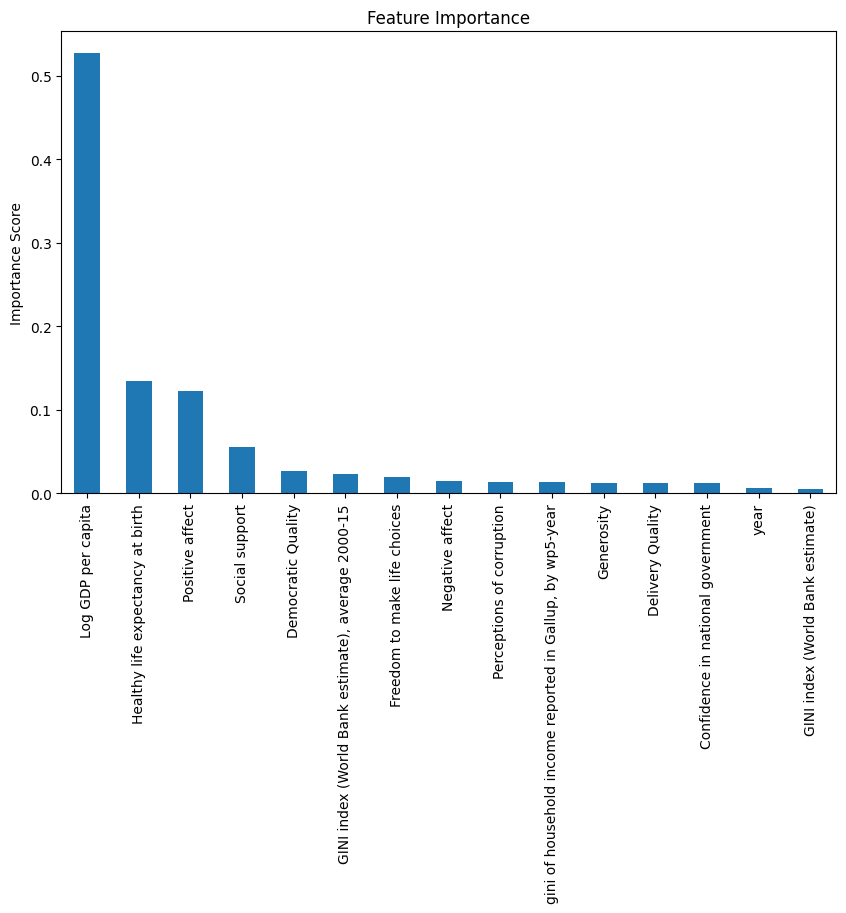

In [136]:
#view features importances
importances = rf.feature_importances_

feat_imp = pd.Series(importances, index=X_train.columns)

# sort descending, so most important feature first 
feat_imp = feat_imp.sort_values(ascending=False)

print(feat_imp)

# Plot it
plt.figure(figsize=(10,6))
feat_imp.plot(kind='bar')
plt.title('Feature Importance')
plt.ylabel('Importance Score')
plt.show()